# WAV to Chromagram converter

### Cell 1 - Imports

In [2]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import gc
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam
import random

### Cell 2 - Grab the file paths for all the music files

In [3]:
DATASET_PATH = "Data/genres_original"
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
file_paths = []
genre_count = []

# Iterate through each genre and load the audio files
for genre in genres:
    genre_path = os.path.join(DATASET_PATH, genre)
    if os.path.isdir(genre_path):
        for file in os.listdir(genre_path):
            if file.endswith(".wav"):
                file_path = os.path.join(genre_path, file)
                try:
                    # Add file path to the list
                    file_paths.append(file_path)
                    # Assign label based on genre index
                    genre_count.append(genres.index(genre))
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")
                    continue

# Print the number of loaded files and labels
print("Files loaded:", len(file_paths))
print("Labels loaded:", len(genre_count))
print("Genres loaded:", len(genres))

genre_count[400], file_paths[400]

Files loaded: 1000
Labels loaded: 1000
Genres loaded: 10


(4, 'Data/genres_original\\hiphop\\hiphop.00000.wav')

### Cell 3 - Show an example of a spectogram on the console

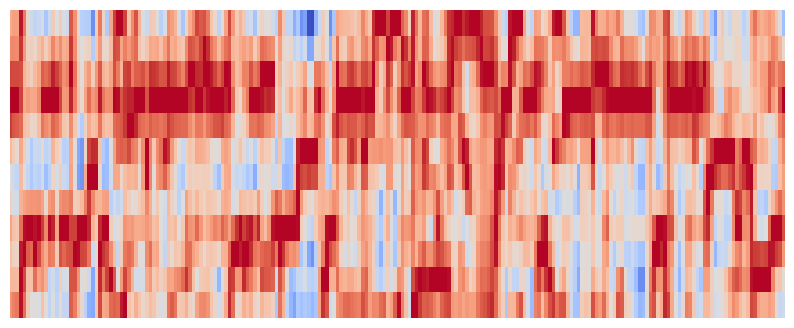

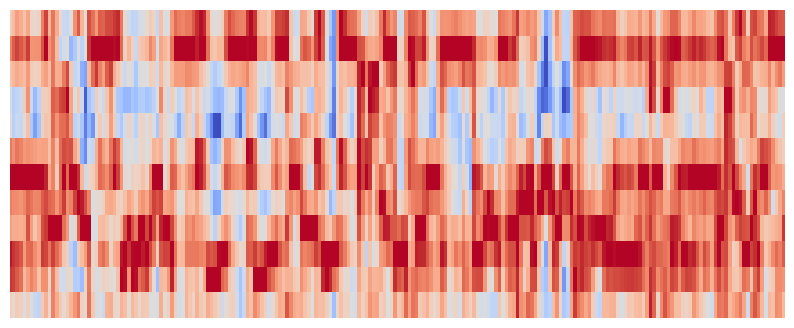

In [ ]:
%matplotlib inline
import random

# CHANGE THE 2 for more showcases
for i in range(2):
    f = random.randint(1,100)
    # Load the audio
    y, sr = librosa.load(file_paths[f], sr=22050)
    y_8k = librosa.resample(y, orig_sr=sr, target_sr=4000)
    #Hop length-> Reduces the time gap between chroma frames, making the chromagram more detailed over time.
    #n_fft -> Increases the number of bins for higher rez but takes longer to compute
    chroma = librosa.feature.chroma_stft(y=y_8k, sr=sr, n_fft=2048, hop_length=512)
    chroma_db = librosa.power_to_db(chroma, ref=np.max)

    #Chromagram being plotted
    plt.figure(figsize=(10, 4))
    #librosa.display.specshow(chroma_db,cmap='coolwarm')
    librosa.display.specshow(chroma_db, y_axis='chroma', x_axis='time', cmap='coolwarm')

    #limits to only 3 secs
    plt.xlim(0,3)

    plt.gca().set_axis_off()  # Remove axes
    plt.gca().set_facecolor('none')  # Transparent background

    plt.show()

### Cell 4 - Create the folders to put the code into and create all mel spectograms for each .wav file across three separate n_mel values

In [ ]:

def create_chromagram(genre, file_path, n_mel):
    # Load the audio
    y, sr = librosa.load(file_path, sr=22050)
    #Hop length-> Reduces the time gap between chroma frames, making the chromagram more detailed over time.
    #n_fft -> Increases the number of bins for higher rez but takes longer to compute
    chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=2048, hop_length=512)
    chroma_db = librosa.power_to_db(chroma, ref=np.max)

    #Chromagram being plotted
    plt.figure(figsize=(10, 4))
    #librosa.display.specshow(chroma_db,cmap='coolwarm')
    librosa.display.specshow(chroma_db, y_axis='chroma', x_axis='time', cmap='coolwarm')
    #limits to only 3 secs
    plt.xlim(0,3)
    plt.gca().set_axis_off()  # Remove axes
    plt.gca().set_facecolor('none')  # Transparent background
    
    # Create the path for saving the image
    savingFilePath = os.path.join("Data", "chromagrams", f"chromagram_{str(n_mel)}", genre, os.path.basename(file_path[:-4]) + ".png")
    
    # Create any missing directories
    os.makedirs(os.path.dirname(savingFilePath), exist_ok=True)
    
    # Save the image
    plt.savefig(savingFilePath, bbox_inches='tight', pad_inches=0, transparent=True, dpi=300)
    plt.clf()
    plt.close()

    if i % 25 ==0:
        gc.collect()
    
# Create the parent directory for the onset envelopes
path = os.path.join("Data", "chromagrams")
os.makedirs(path, exist_ok=True)
    
# Creating the directories for the genres
n_mels_lengths = [12, 24, 36] # Chromagrams use a multiple of 12 bins for each note in chromatic scale
for n_mels in n_mels_lengths:
    for genre in genres:
        folder_path = os.path.join("Data", "chromagrams", f"chromagram_{n_mels}", genre)
        os.makedirs(folder_path, exist_ok=True)

# Example loop to generate mel spectrograms
n_mels_lengths = [12, 24, 36]  # You can adjust the n_mels values as needed
for n_mels in n_mels_lengths:
    for i in range(len(file_paths)):  # Iterate over all file paths
        genre = genres[genre_count[i]]  # Ensure the genre matches the index
        file_path = file_paths[i]  # Get the corresponding file path
        # print(file_path)
        create_chromagram(genre, file_path, n_mels)

Data/genres_original\blues\blues.00000.wav
Data/genres_original\blues\blues.00001.wav
Data/genres_original\blues\blues.00002.wav
Data/genres_original\blues\blues.00003.wav
Data/genres_original\blues\blues.00004.wav
Data/genres_original\blues\blues.00005.wav
Data/genres_original\blues\blues.00006.wav
Data/genres_original\blues\blues.00007.wav
Data/genres_original\blues\blues.00008.wav
Data/genres_original\blues\blues.00009.wav
Data/genres_original\blues\blues.00010.wav
Data/genres_original\blues\blues.00011.wav
Data/genres_original\blues\blues.00012.wav
Data/genres_original\blues\blues.00013.wav
Data/genres_original\blues\blues.00014.wav
Data/genres_original\blues\blues.00015.wav
Data/genres_original\blues\blues.00016.wav
Data/genres_original\blues\blues.00017.wav
Data/genres_original\blues\blues.00018.wav
Data/genres_original\blues\blues.00019.wav
Data/genres_original\blues\blues.00020.wav
Data/genres_original\blues\blues.00021.wav
Data/genres_original\blues\blues.00022.wav
Data/genres

# 5 - Same thing, but for three seconds

In [ ]:
def create_chromagram(genre, file_path, n_mel, clip_number, total_clips=10):
    # Load the audio
    y, sr = librosa.load(file_path, sr=22050)
    
    # Calculate the start and end time for the clip
    start_time = (clip_number - 1) * 3  # 3-second intervals (clip_number is 1-based)
    end_time = clip_number * 3  # 3-second intervals
    
    # Slice the audio to the desired time segment (start_time to end_time)
    y_segment = y[int(start_time * sr): int(end_time * sr)]
    
    # Generate chromagram for the segment
    chroma = librosa.feature.chroma_stft(y=y_segment, sr=sr, n_fft=2048, hop_length=512)
    chroma_db = librosa.power_to_db(chroma, ref=np.max)
    
    # Create a figure with tight layout and no extra space
    plt.figure(figsize=(2, 4), frameon=False)
    
    # Create the subplot with no padding
    ax = plt.subplot(111)
    
    # Plot the chromagram
    librosa.display.specshow(chroma_db, y_axis='chroma', x_axis='time', cmap='coolwarm', ax=ax)
    
    # Remove axes, ticks, and labels
    ax.set_axis_off()
    
    # Set the background to transparent
    ax.set_facecolor('none')
    
    # Remove all margins and padding
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
    
    # Prepare the saving path
    savingFilePath = os.path.join("Data", "chromagrams (3 secs)", f"chromagram_{str(n_mel)}", 
                                 genre, os.path.basename(file_path[:-4]) + f"_clip_{clip_number}_of_{total_clips}.png")
    
    # Create any missing directories
    os.makedirs(os.path.dirname(savingFilePath), exist_ok=True)
    
    # Save with tight bounding box and explicitly set zero padding
    plt.savefig(savingFilePath, bbox_inches='tight', pad_inches=0, transparent=True, dpi=300, format='png')
    
    # Clean up
    plt.clf()
    plt.close('all')  # Close all figures to prevent memory leaks
    
    # Optionally, collect garbage to manage memory usage
    if clip_number % 50 == 0:
        gc.collect()
        
n_mels_lengths = [12, 24, 36]  # Different values for n_mels, adjust as needed
        
# Create the folders for saving the chromagrams
os.makedirs(os.path.join("Data", "chromagrams (3 secs)"), exist_ok=True)
for n_mel in n_mels_lengths:
    os.makedirs(os.path.join("Data", "chromagrams (3 secs)", f"chromagram_{str(n_mel)}"), exist_ok=True)
    for genre in genres:
        os.makedirs(os.path.join("Data", "chromagrams (3 secs)", f"chromagram_{str(n_mel)}", genre), exist_ok=True)

# Iterate through each song, generating 10 clips per song
for n_mels in n_mels_lengths:
    for i in range(len(file_paths)):  # Iterate over all file paths
        genre = genres[genre_count[i]]  # Ensure the genre matches the index
        file_path = file_paths[i]  # Get the corresponding file path
        print("Filling chromagrams for", file_path)
        
        # Generate 10 segments for each song (each 3 seconds)
        for clip_number in range(1, 11):  # From clip 1 to 10
            # print(f"Processing clip {clip_number} of 10 for {file_path}")
            create_chromagram(genre, file_path, n_mels, clip_number)